# astropy Coffee and Code

astropy is a package that contains common tools needed for performing astronomy and astrophysics with Python

There are lots of packages and subpackages:

* Constants (`astropy.constants`)
* Units and Quantities (`astropy.units`)
* N-dimensional datasets (`astropy.nddata`)
* Data Tables (`astropy.table`)
* Time and Dates (`astropy.time`)
* Astronomical Coordinate Systems (`astropy.coordinates`)
* World Coordinate System (`astropy.wcs`)
* Models and Fitting (`astropy.modeling`)
* FITS File handling (`astropy.io.fits`)
* ASCII Tables (`astropy.io.ascii`)
* VOTable XML handling (`astropy.io.votable`)
* Miscellaneous Input/Output (`astropy.io.misc`)
* Convolution and filtering (`astropy.convolution`)
* Cosmological Calculations (`astropy.cosmology`)
* Astrostatistics Tools (`astropy.stats`)
* Virtual Observatory Access (`astropy.vo`)

Today taking a look at `astropy.io.fits` for fits images (not fits tables)

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## FITS file handling - astropy.io.fits

### FITS files

Flexible Image Transport System (FITS) is a standard format for exchange of astronomical data.

A FITS format file consists of a series of Header Data Units (HDUs). Each contains an ASCII text header and a binary data array (usually image) or table. FITS files can have multiple HDUs called extensions.

FITS headers consist of a list of 80 byte “cards”, where a card contains a keyword, a value, and a comment. The keyword and comment must both be strings, whereas the value can be a string, an integer, a floating point number, a complex number, or True/False. Keywords are usually unique within a header, except in a few special cases such as HISTORY or COMMENT.

<img src="notebook_files/FITS_file_schema.jpg">

In [3]:
from astropy.io import fits

### Convenience functions

Convenience functions (getheader(), getdata(), writeto(), append(), update() etc) achieve one simple task. Using them means you do not have to worry about opening or closing files etc. They are fine for interactive sessions and simple scripts, but should not be used for application code, as they are very inefficient.

In [4]:
test_hdr = fits.getheader('test.fits')

In [5]:
type(test_hdr)

astropy.io.fits.header.Header

In [6]:
test_hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2070 / length of data axis 1                          
NAXIS2  =                 4098 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DCT_DATE= 'Mar  8 2012'        / DCT release date                               
DCT_VER = 'r3_110_1_1'         / DCT version number                             
DETECXE =                 20

In [7]:
test_hdr['OBJECT']

'NGC 1851 full target list'

change a value and comment - this does not overwrite the file on disk - use fits.writeto() with clobber = True

In [8]:
test_hdr['OBJECT'] = ('NGC9999', 'object changed to NGC9999')

In [9]:
test_hdr['OBJECT']

'NGC9999'

add a new field and comment - this does not overwrite the file on disk - use fits.writeto() with clobber = True

In [10]:
test_hdr['HISTORY'] = ('22-9-14', 'date updated on')

In [11]:
test_hdr['HISTORY']

22-9-14

In [12]:
test_dat = fits.getdata('test.fits')

In [13]:
type(test_dat)

numpy.ndarray

In [14]:
test_hdr, test_dat = fits.getdata('test.fits', ext = 0, header = True)

### For Application Code

In [15]:
hdulist = fits.open('test.fits')

HDUList is a list-like collection of HDU objects with .header and .data attributes, which can be used to access the header and data portions of the HDU.

In [16]:
hdulist.info()

Filename: test.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     135   (2070, 4098)   int16 (rescales to uint16)   
  1  STRUCT.MORE.FIBRES  BinTableHDU    102   400R x 15C   [80A, 1D, 1D, 1J, 1J, 1I, 1I, 1D, 1A, 1I, 1D, 1J, 80A, 10A, 1D]   
  2  STRUCT.MORE.NDF_CLASS  BinTableHDU     14   1R x 1C   [8A]   


###### Working with headers

In [17]:
test_hdr = hdulist[0].header

In [18]:
test_hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2070 / length of data axis 1                          
NAXIS2  =                 4098 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DCT_DATE= 'Mar  8 2012'        / DCT release date                               
DCT_VER = 'r3_110_1_1'         / DCT version number                             
DETECXE =                 20

In [19]:
test_hdr[5:10]

EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         

In [20]:
test_hdr['OBJECT']

'NGC 1851 full target list'

change a value and comment - this does not overwrite the file on disk - use hdulist.writeto() with clobber = True

In [21]:
test_hdr.set('OBJECT', 'NGC9999', 'object changed to NGC9999')

In [22]:
test_hdr['OBJECT']

'NGC9999'

add a new field and comment - this does not overwrite the file on disk - use hdulist.writeto() with clobber = True

In [23]:
test_hdr.set('HISTORY','8-10-14', 'date updated on')

In [24]:
test_hdr.set('HISTORY','9-10-14', 'date updated on')

In [25]:
test_hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2070 / length of data axis 1                          
NAXIS2  =                 4098 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DCT_DATE= 'Mar  8 2012'        / DCT release date                               
DCT_VER = 'r3_110_1_1'         / DCT version number                             
DETECXE =                 20

###### Working with image data

In [26]:
test_dat = hdulist[0].data

In [27]:
test_dat.shape

(4098, 2070)

In [28]:
test_dat.dtype

dtype('uint16')

<IPython.core.display.Javascript object>


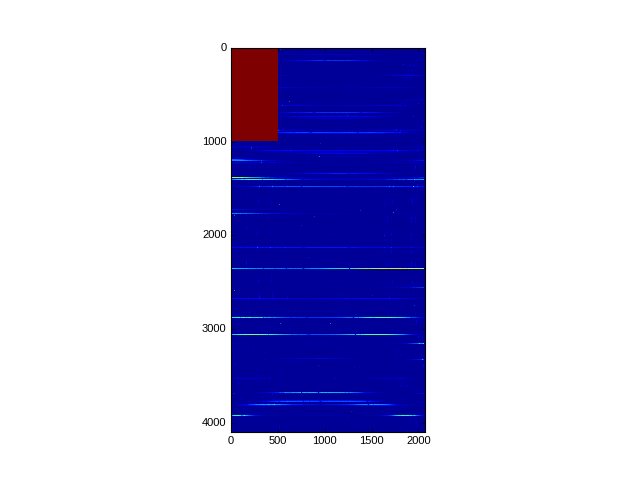

In [29]:
fig, ax = plt.subplots(squeeze=True)
ax.imshow(test_dat, vmax = 2000)
plt.show()

<IPython.core.display.Javascript object>


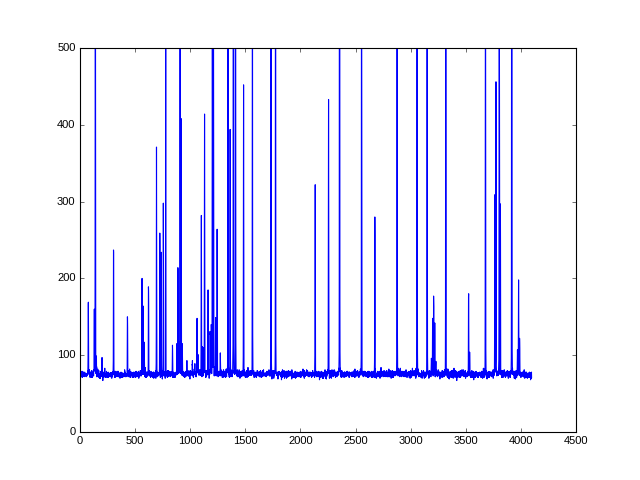

In [30]:
fig, ax = plt.subplots(squeeze=True)
ax.set_ylim(0, 500) 
ax.plot(test_dat[:,500])
plt.show()

<IPython.core.display.Javascript object>


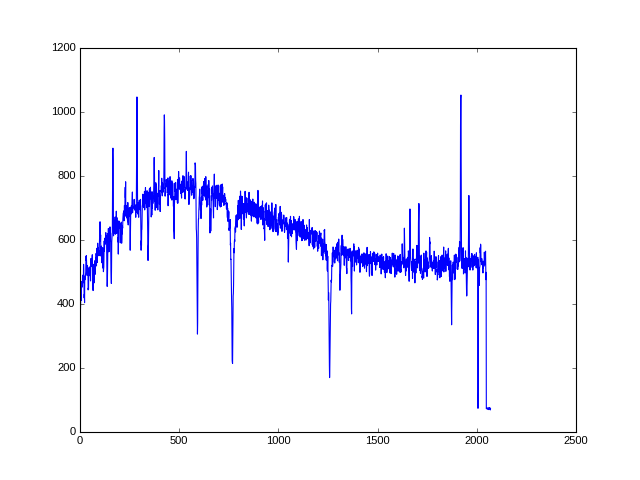

In [31]:
fig, ax = plt.subplots(squeeze=True)
ax.plot(test_dat[1774,:])
plt.show()

In [32]:
test_dat[1,4]

77

In [33]:
test_dat[0:10, 0:20]

array([[ 72,  77,  75,  74,  77,  76,  74,  74,  75,  72,  73,  69,  74,
         74,  76,  72,  71,  75,  73,  73],
       [ 74,  77,  73,  77,  77,  73,  74,  74,  73,  76,  72,  73,  74,
         74,  76,  73,  75,  74,  74,  75],
       [ 74,  70,  71,  72,  78,  75,  78,  74,  73,  72,  74,  73,  77,
         73,  73,  76,  75,  76,  72,  73],
       [ 77,  73,  71,  70,  72,  71,  75,  74,  76,  75,  76,  73,  72,
         73,  74,  74,  74,  73,  74,  73],
       [ 72,  75,  73,  74,  74,  76,  78,  75,  74,  71,  73,  75,  77,
         76,  77,  78,  76,  76,  76,  75],
       [ 72,  77,  77,  74,  78,  83,  83,  78,  78,  72,  73,  75,  71,
         71,  76,  74,  72,  72,  76,  73],
       [ 74,  76,  73,  82,  94, 104, 106,  91,  73,  76,  71,  71,  74,
         73,  75,  74,  77,  73,  74,  75],
       [ 75,  78,  75,  92, 121, 124, 121, 104,  75,  77,  78,  74,  74,
         75,  77,  69,  73,  76,  80,  76],
       [ 71,  75,  84, 102, 125, 123, 129,  96,  76,  76,  76,  

change a value -  this does not overwrite the file on disk - use hdulist.writeto() with clobber = True

In [34]:
test_dat[1,4] = 9999

In [35]:
test_dat[1,4]

9999

In [36]:
test_dat[0:1000,0:500] = 9999

In [37]:
test_dat[0:10, 0:10]

array([[9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
       [9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999]], dtype=uint16)

<IPython.core.display.Javascript object>


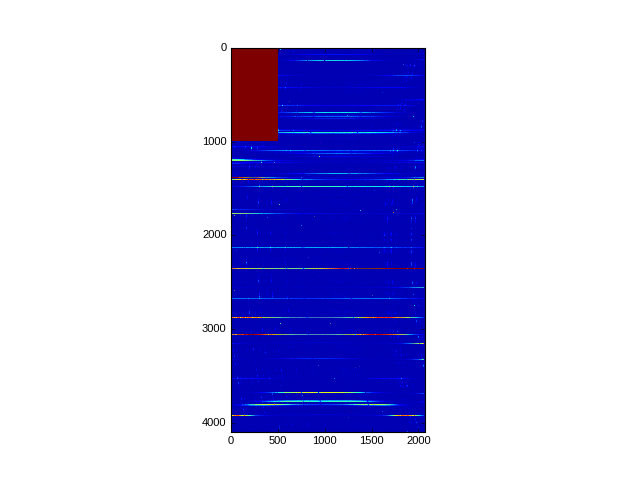

In [38]:
fig, ax = plt.subplots(squeeze=True)
ax.imshow(test_dat, vmax = 1000)
plt.show()

In [39]:
#hdulist.writeto('test.fits', clobber = True)

In [40]:
hdulist.close()